<a href="https://colab.research.google.com/github/runyakeng/runyakeng/blob/main/class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
url = '/content/drive/MyDrive/data_G3.xlsm'
data = pd.read_excel(url)

In [ ]:
data.shape

(183384, 22)

In [ ]:
data.head(20)

,LN_TYPE,SUBT,MKTCD,BAL,PCM,PAMT,FIX_PRI_AMT,FIX_INT_AMT,IRN_INT,MAX_OND,SCHSEQ,MDT,PROVCAT,PRINCIPAL,OSEQ,TDR,TDR_CONDT,DELSTAT,DR,PURPOSE_CODE,YEAR_TDR_CONDT,CLS_BEFORE_TDR
0,7200,20002,1037,551504.88,15,4000.0,0.0,0.0,8.15,180,120,20230630,1,700000.0,0,4,20210916.0,1,Y,NO,2021.0,2.0
1,7200,20002,1037,39211.72,15,8200.0,0.0,0.0,7.15,120,124,20210730,3,700000.0,5,5,20150227.0,2,Y,NO,2015.0,2.0
2,7200,20002,1040,86848.10,15,2600.0,0.0,0.0,8.65,83,125,20240229,1,151000.0,1,4,20181030.0,1,Y,NO,2018.0,5.0
3,7200,20002,1037,1286040.87,15,5300.0,0.0,0.0,7.15,156,119,20250531,1,1500000.0,1,4,20210125.0,1,Y,HAVE,2021.0,2.0
4,7200,20002,1037,945067.81,15,8000.0,0.0,0.0,7.50,156,124,20290424,1,1700000.0,0,4,20210921.0,1,Y,NO,2021.0,1.0
5,7200,20002,1037,312075.58,15,4000.0,0.0,0.0,7.15,180,125,20250731,1,500000.0,1,5,20151221.0,2,Y,NO,2015.0,3.0
6,7200,20002,1037,1030300.00,15,7000.0,0.0,0.0,7.15,180,123,20250731,1,1400000.0,0,4,20210325.0,1,Y,NO,2021.0,1.0
7,7200,20002,1037,949732.04,15,9500.0,0.0,0.0,7.15,180,125,20250930,1,1400000.0,0,4,20200227.0,1,Y,NO,2020.0,2.0
8,7200,20002,1037,1035107.48,15,8500.0,0.0,0.0,7.15,180,123,20261231,1,1300000.0,0,4,20210325.0,1,Y,NO,2021.0,1.0
9,7200,20002,1041,95153.31,15,1000.0,0.0,0.0,6.65,120,122,20210131,4,300000.0,>5,4,20190626.0,2,Y,HAVE,2019.0,2.0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183384 entries, 0 to 183383
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LN_TYPE         183384 non-null  int64  
 1   SUBT            183384 non-null  int64  
 2   MKTCD           183384 non-null  int64  
 3   BAL             183384 non-null  float64
 4   PCM             183384 non-null  int64  
 5   PAMT            183384 non-null  float64
 6   FIX_PRI_AMT     183384 non-null  float64
 7   FIX_INT_AMT     183384 non-null  float64
 8   IRN_INT         183384 non-null  float64
 9   MAX_OND         183384 non-null  int64  
 10  SCHSEQ          183384 non-null  int64  
 11  MDT             183384 non-null  int64  
 12  PROVCAT         183384 non-null  int64  
 13  PRINCIPAL       183384 non-null  float64
 14  OSEQ            183384 non-null  object 
 15  TDR             183384 non-null  int64  
 16  TDR_CONDT       54372 non-null   float64
 17  DELSTAT   

In [ ]:
data.isnull().sum()

LN_TYPE                0
SUBT                   0
MKTCD                  0
BAL                    0
PCM                    0
PAMT                   0
FIX_PRI_AMT            0
FIX_INT_AMT            0
IRN_INT                0
MAX_OND                0
SCHSEQ                 0
MDT                    0
PROVCAT                0
PRINCIPAL              0
OSEQ                   0
TDR                    0
TDR_CONDT         129012
DELSTAT                0
DR                     0
PURPOSE_CODE           0
YEAR_TDR_CONDT    129012
CLS_BEFORE_TDR    128992
dtype: int64

In [ ]:
data=data.drop(['TDR_CONDT','YEAR_TDR_CONDT','CLS_BEFORE_TDR'],axis=1)

In [ ]:
data.isnull().sum()

LN_TYPE         0
SUBT            0
MKTCD           0
BAL             0
PCM             0
PAMT            0
FIX_PRI_AMT     0
FIX_INT_AMT     0
IRN_INT         0
MAX_OND         0
SCHSEQ          0
MDT             0
PROVCAT         0
PRINCIPAL       0
OSEQ            0
TDR             0
DELSTAT         0
DR              0
PURPOSE_CODE    0
dtype: int64

In [ ]:
data['PROVCAT2']=np.where((data["PROVCAT"] < 3 ), 'G', data['PROVCAT'])
data['PROVCAT2']=np.where((data["PROVCAT"] > 2 ), 'B', data['PROVCAT2'])

In [ ]:
data['PROVCAT2'].unique()

array(['G', 'B'], dtype=object)

In [ ]:
data['PROVCAT2'].value_counts()

G    176357
B      7027
Name: PROVCAT2, dtype: int64

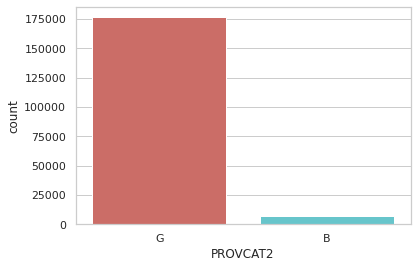

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='PROVCAT2',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
data.groupby('PROVCAT2').mean()

,LN_TYPE,SUBT,MKTCD,BAL,PCM,PAMT,FIX_PRI_AMT,FIX_INT_AMT,IRN_INT,MAX_OND,SCHSEQ,MDT,PROVCAT,PRINCIPAL,TDR,DELSTAT
PROVCAT2,,,,,,,,,,,,,,,,
B,7200.0,20002.010815,1040.712537,460566.090871,14.992031,7268.598133,3.183499,3.661527,8.329426,132.196528,108.002419,2.024675e+07,4.198378,734162.020236,2.795361,1.990608
G,7200.0,20002.040293,1058.264237,413047.031709,14.997964,5591.345493,8.905089,3.434992,6.731523,171.758501,89.504505,2.028427e+07,1.025670,740389.832007,1.152651,1.033217


In [ ]:
data.groupby('MKTCD').count()

,LN_TYPE,SUBT,BAL,PCM,PAMT,FIX_PRI_AMT,FIX_INT_AMT,IRN_INT,MAX_OND,SCHSEQ,MDT,PROVCAT,PRINCIPAL,OSEQ,TDR,DELSTAT,DR,PURPOSE_CODE,PROVCAT2
MKTCD,,,,,,,,,,,,,,,,,,,
1035,6775,6775,6775,6775,6775,6775,6775,6775,6775,6775,6775,6775,6775,6775,6775,6775,6775,6775,6775
1036,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1037,108255,108255,108255,108255,108255,108255,108255,108255,108255,108255,108255,108255,108255,108255,108255,108255,108255,108255,108255
1038,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246
1040,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128
1041,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906
1144,27953,27953,27953,27953,27953,27953,27953,27953,27953,27953,27953,27953,27953,27953,27953,27953,27953,27953,27953
1151,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112
1177,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887


In [ ]:
data.groupby('OSEQ').mean()

,LN_TYPE,SUBT,MKTCD,BAL,PCM,PAMT,FIX_PRI_AMT,FIX_INT_AMT,IRN_INT,MAX_OND,SCHSEQ,MDT,PROVCAT,PRINCIPAL,TDR,DELSTAT
OSEQ,,,,,,,,,,,,,,,,
0,7200.0,20002.055291,1064.751864,413862.180064,14.998122,5625.178172,1.082948,0.736538,6.510931,182.543073,86.895243,2.029375e+07,1.004790,738503.548578,0.793024,1.022016
1,7200.0,20002.003124,1042.894049,397787.237395,14.997950,5497.160409,0.986703,1.189552,7.236138,145.392612,94.044065,2.026128e+07,1.008648,735259.227663,1.739934,1.048589
2,7200.0,20002.002704,1039.476119,470824.876160,14.997897,5497.389028,208.460743,69.387722,7.395554,144.712526,103.439171,2.026038e+07,1.027636,801631.353710,3.074647,1.068038
3,7200.0,20002.003691,1039.301138,475062.270000,14.995694,5803.512971,0.461396,0.553676,7.518800,143.380806,103.581360,2.025949e+07,2.012919,775985.918782,3.296832,1.103968
4,7200.0,20002.003067,1039.805215,403007.980928,14.990031,4599.547347,4.187255,1.410905,7.559613,136.039110,102.272239,2.025450e+07,2.055215,690374.769939,3.386503,1.648773
5,7200.0,20002.001706,1040.822526,326243.805068,15.000000,4336.939744,1.860068,1.552901,7.636382,127.580205,102.486348,2.024407e+07,2.974403,647269.732082,2.994881,1.984642
>5,7200.0,20002.012383,1040.837659,467272.318222,14.990500,7841.790397,3.609915,4.210271,8.457198,132.106192,108.757930,2.024482e+07,4.400170,739524.114198,2.761662,1.999830


In [ ]:
data.groupby('PCM').mean()

,LN_TYPE,SUBT,MKTCD,BAL,PAMT,FIX_PRI_AMT,FIX_INT_AMT,IRN_INT,MAX_OND,SCHSEQ,MDT,PROVCAT,PRINCIPAL,TDR,DELSTAT
PCM,,,,,,,,,,,,,,,
1,7200.0,20002.00000,1037.240000,857589.172800,9002.80000,5479.48120,3993.438800,7.280000,155.92000,110.600000,2.026595e+07,1.560000,1.085200e+06,2.840000,1.360000
2,7200.0,20002.00000,1079.800000,789030.378000,892.00000,2560.00000,0.000000,2.770000,249.40000,83.200000,2.035856e+07,1.200000,1.033400e+06,1.600000,1.000000
15,7200.0,20002.03917,1057.593851,414797.323268,5655.28882,7.87034,2.899737,6.792795,170.24234,90.210729,2.028284e+07,1.147185,7.400961e+05,1.215365,1.069865


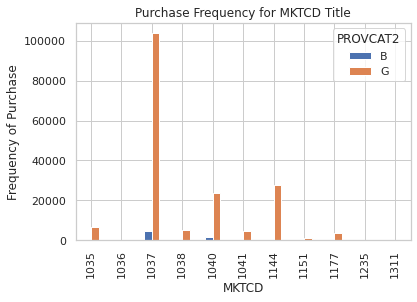

In [ ]:
%matplotlib inline
pd.crosstab(data.MKTCD,data.PROVCAT2).plot(kind='bar')
plt.title('Purchase Frequency for MKTCD Title')
plt.xlabel('MKTCD')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_MKTCD')

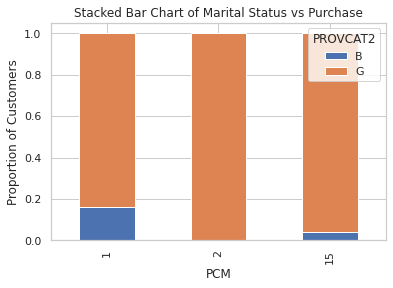

In [ ]:
table=pd.crosstab(data.PCM,data.PROVCAT2 )
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('PCM')
plt.ylabel('Proportion of Customers')
plt.savefig('PCM')

In [ ]:
data.OSEQ.unique()

array([0, 5, 1, '>5', 2, 3, 4], dtype=object)

In [ ]:
data.TDR.unique()

array([4, 5, 3, 1, 2, 0])

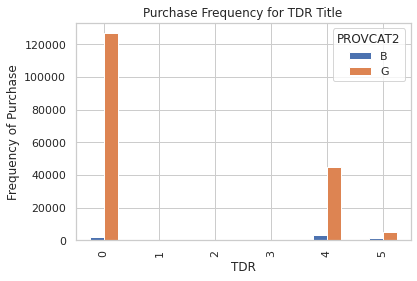

In [ ]:
%matplotlib inline
pd.crosstab(data.TDR,data.PROVCAT2).plot(kind='bar')
plt.title('Purchase Frequency for TDR Title')
plt.xlabel('TDR')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_TDR')

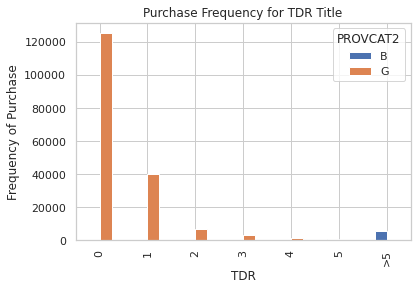

In [ ]:
%matplotlib inline
pd.crosstab(data.OSEQ,data.PROVCAT2).plot(kind='bar')
plt.title('Purchase Frequency for TDR Title')
plt.xlabel('TDR')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_TDR')

In [ ]:
cat_vars=['MKTCD','PCM','OSEQ','TDR','DR','PURPOSE_CODE']
for var in cat_vars:
    cat_list='var'+'_'+var
    print("Line 4 = ",cat_list)
    cat_list = pd.get_dummies(data[var], prefix=var)
    #print("Line 6 = ",cat_list)
    data1 = data.join(cat_list)
    #print("Line 8 = ",data1)
    data=data1

Line 4 =  var_MKTCD
Line 4 =  var_PCM
Line 4 =  var_OSEQ
Line 4 =  var_TDR
Line 4 =  var_DR
Line 4 =  var_PURPOSE_CODE


In [ ]:
cat_vars=['MKTCD','PCM','OSEQ','TDR','DR','PURPOSE_CODE']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=data[to_keep]
data_final.columns.values

array(['LN_TYPE', 'SUBT', 'BAL', 'PAMT', 'FIX_PRI_AMT', 'FIX_INT_AMT',
       'IRN_INT', 'MAX_OND', 'SCHSEQ', 'MDT', 'PROVCAT', 'PRINCIPAL',
       'DELSTAT', 'PROVCAT2', 'MKTCD_1035', 'MKTCD_1036', 'MKTCD_1037',
       'MKTCD_1038', 'MKTCD_1040', 'MKTCD_1041', 'MKTCD_1144',
       'MKTCD_1151', 'MKTCD_1177', 'MKTCD_1235', 'MKTCD_1311', 'PCM_1',
       'PCM_2', 'PCM_15', 'OSEQ_0', 'OSEQ_1', 'OSEQ_2', 'OSEQ_3',
       'OSEQ_4', 'OSEQ_5', 'OSEQ_>5', 'TDR_0', 'TDR_1', 'TDR_2', 'TDR_3',
       'TDR_4', 'TDR_5', 'DR_N', 'DR_Y', 'PURPOSE_CODE_HAVE',
       'PURPOSE_CODE_NO'], dtype=object)

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['PROVCAT2']
x=[i for i in data_final_vars if i not in y]
print(len(x))

44


In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=None, step=1)
rfe = rfe.fit(data_final[x], data_final[y])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
print(rfe.support_)
print(rfe.ranking_)
print(rfe.get_feature_names_out())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False  True False  True False False False False
 False False False  True  True False False False  True  True  True False
 False False  True  True False False False False]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  6 20  2 10  1  8  1 14 13 21 18
 19 23 17  1  1  5 11 15  1  1  1 12  7  9  1  1 22 16  3  4]
['LN_TYPE' 'SUBT' 'BAL' 'PAMT' 'FIX_PRI_AMT' 'FIX_INT_AMT' 'IRN_INT'
 'MAX_OND' 'SCHSEQ' 'MDT' 'PROVCAT' 'PRINCIPAL' 'DELSTAT' 'MKTCD_1040'
 'MKTCD_1144' 'OSEQ_0' 'OSEQ_1' 'OSEQ_5' 'OSEQ_>5' 'TDR_0' 'TDR_4' 'TDR_5']


In [ ]:
cols = rfe.get_feature_names_out()
X=data_final[cols]
y=data_final['PROVCAT2']
import pprint
print(X.head())

   LN_TYPE   SUBT         BAL    PAMT  ...  OSEQ_>5  TDR_0  TDR_4  TDR_5
0     7200  20002   551504.88  4000.0  ...        0      0      1      0
1     7200  20002    39211.72  8200.0  ...        0      0      0      1
2     7200  20002    86848.10  2600.0  ...        0      0      1      0
3     7200  20002  1286040.87  5300.0  ...        0      0      1      0
4     7200  20002   945067.81  8000.0  ...        0      0      1      0

[5 rows x 22 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
print(y_train.shape)
print(X_test.shape)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

(146707,)
(36677, 22)


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print(y_pred)

['G' 'G' 'G' ... 'G' 'G' 'G']


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


10-fold cross validation average accuracy: 0.962


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.75      0.00      0.00      1405
           G       0.96      1.00      0.98     35272

    accuracy                           0.96     36677
   macro avg       0.86      0.50      0.49     36677
weighted avg       0.95      0.96      0.94     36677



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=3, max_depth=None,min_samples_split=2, random_state=0)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
print(y_pred2)

['G' 'G' 'G' ... 'G' 'G' 'G']


In [ ]:
print("Random forest")
print(classification_report(y_test, y_pred2))

Random forest
              precision    recall  f1-score   support

           B       1.00      1.00      1.00      1405
           G       1.00      1.00      1.00     35272

    accuracy                           1.00     36677
   macro avg       1.00      1.00      1.00     36677
weighted avg       1.00      1.00      1.00     36677



In [ ]:
from sklearn import tree
clf3 = tree.DecisionTreeClassifier()
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
print(y_pred3)
print("Decision tree")
print(classification_report(y_test, y_pred3))

['G' 'G' 'G' ... 'G' 'G' 'G']
Decision tree
              precision    recall  f1-score   support

           B       1.00      1.00      1.00      1405
           G       1.00      1.00      1.00     35272

    accuracy                           1.00     36677
   macro avg       1.00      1.00      1.00     36677
weighted avg       1.00      1.00      1.00     36677

